<a href="https://colab.research.google.com/github/whyclos/time-series/blob/main/covidus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание №1 по курсу "Анализ временных рядов"

Соколова Диана БМТ1-12М (возвращаюсь в семью)

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd '/content/gdrive/MyDrive/Colab Notebooks/'

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
data_t = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/covidus.csv', sep = ';')
data_t['DateTime'] = pd.to_datetime(data_t['DateTime'])

In [ ]:
data_t.head()

,DateTime,Смертей за день,Заражений за день,Выздоровлений за день
0,2020-01-22,17,557,30.0
1,2020-01-23,1,100,2.0
2,2020-01-24,8,287,7.0
3,2020-01-25,16,493,3.0
4,2020-01-26,14,683,14.0


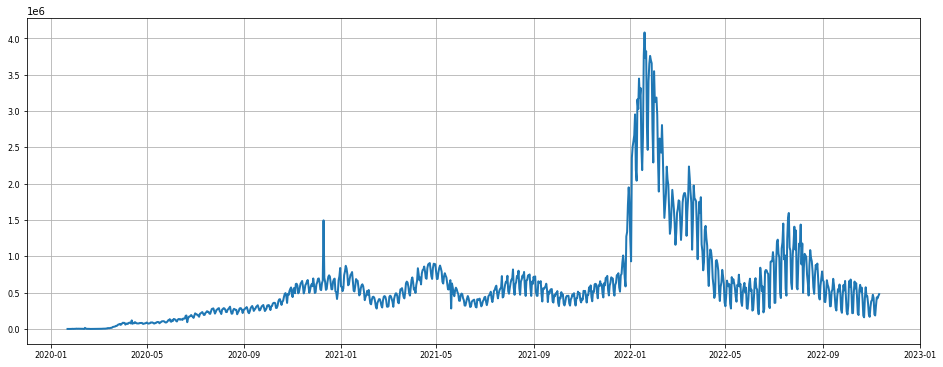

In [ ]:
#Визуалилизируем датасет
plt.figure(figsize=(16, 6))
plt.plot(data_t["DateTime"], data_t["Заражений за день"], linewidth = 2)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.grid()

In [ ]:
#средняя периодичность за все время
ts_mean = np.mean(np.diff(data_t['DateTime'])) / np.timedelta64(1, 's')
fs = 1/ts_mean
ts_mean

86400.0

In [ ]:
#перевод из даты в дни (номер дня)
seconds = [i*ts_mean for i in range(len(data_t))]
data_t['sec'] = seconds
data_t.head()

,DateTime,Смертей за день,Заражений за день,Выздоровлений за день,sec
0,2020-01-22,17,557,30.0,0.0
1,2020-01-23,1,100,2.0,86400.0
2,2020-01-24,8,287,7.0,172800.0
3,2020-01-25,16,493,3.0,259200.0
4,2020-01-26,14,683,14.0,345600.0


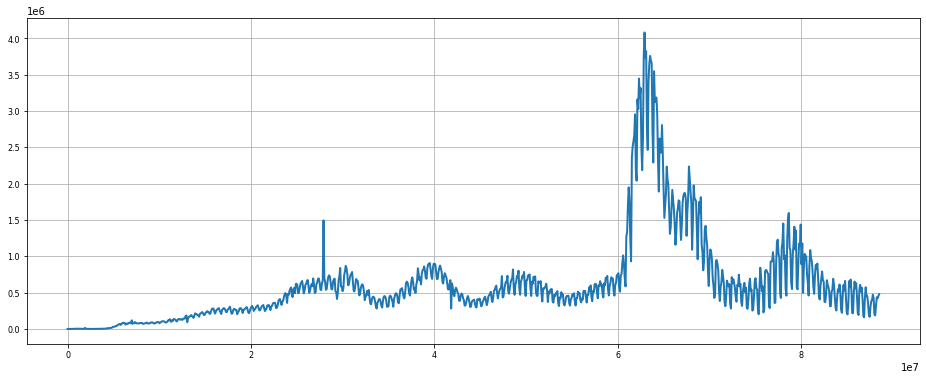

In [ ]:
plt.figure(figsize=(16, 6))
plt.grid()
plt.plot(data_t["sec"], data_t["Заражений за день"], linewidth = 2)
plt.tick_params(axis='both', which='major', labelsize=8)

In [ ]:
#Прямое преобразование Фурье
f_data = np.fft.fft(data_t['Заражений за день'])
f = [i*fs for i in range(len(f_data))]

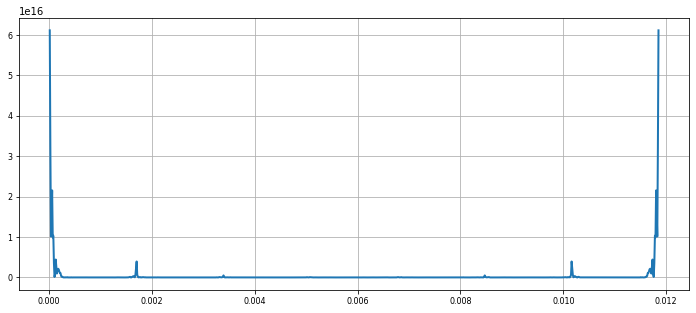

In [ ]:
#Построим график спектральной плотности
plt.figure(figsize=(12, 5))
plt.grid()
plt.plot(f[1:], (abs(f_data)**2)[1:], linewidth = 2)
plt.tick_params(axis='both', which='major', labelsize=8)

In [ ]:
#Найдем угол и коэффициент Ak (модуль)
theta = np.angle(f_data)
a = (f_data.real**2 + f_data.imag**2)**(1/2)

In [ ]:
new_y = np.zeros(len(f_data))
for i in range(int(len(f_data) / 2)):
    new_y += np.cos(2 * np.pi * fs/len(new_y) * i * data_t['sec']  + theta[i]) * a[i]

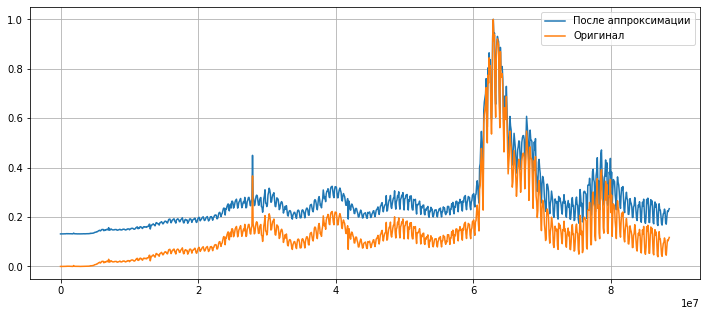

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(data_t.sec, new_y/max(new_y), label = 'После аппроксимации')
plt.plot(data_t['sec'], data_t["Заражений за день"]/max(data_t["Заражений за день"]), label = 'Оригинал')
plt.legend()
plt.grid()

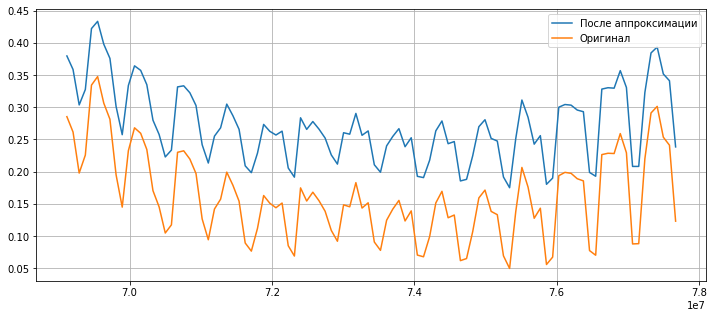

In [ ]:
#Посмотрим более детально
plt.figure(figsize=(12, 5))
plt.plot(data_t.sec[800:900], new_y[800:900]/max(new_y), label = 'После аппроксимации')
plt.plot(data_t['sec'][800:900], data_t["Заражений за день"][800:900]/max(data_t["Заражений за день"]), label = 'Оригинал')
plt.legend()
plt.grid()

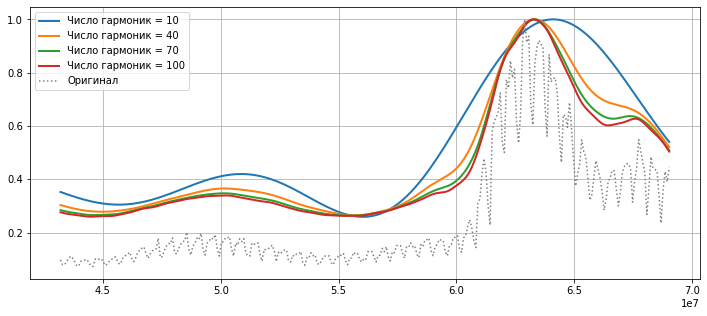

In [ ]:
#Попробуем несколько вариантов аппроксимации 
plt.figure(figsize=(12, 5))
new_y = np.zeros(len(f_data))
for k in range(10, 110, 30):
    for i in range(k):
        new_y += np.cos(2 * np.pi * fs/len(new_y) * i * data_t['sec']  + theta[i]) * a[i]
    plt.plot(data_t.sec[500:800], new_y[500:800]/max(new_y), label = f'Число гармоник = {k}', linewidth = 2)
plt.plot(data_t['sec'][500:800], data_t["Заражений за день"][500:800]/max(data_t["Заражений за день"]), label = 'Оригинал', 
         linestyle=':', color = "gray")
plt.legend()
plt.grid()

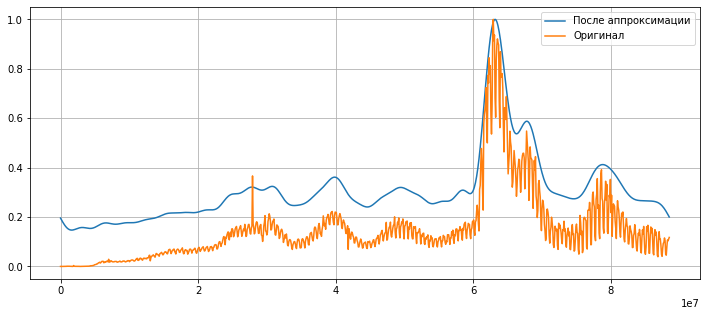

In [ ]:
new_y = np.zeros(len(f_data))
for i in range(30):
    new_y += np.cos(2 * np.pi * fs/len(new_y) * i * data_t['sec']  + theta[i]) * a[i]
plt.figure(figsize=(12, 5))
plt.plot(data_t.sec, new_y/max(new_y), label = 'После аппроксимации')
plt.plot(data_t['sec'], data_t["Заражений за день"]/max(data_t["Заражений за день"]), label = 'Оригинал')
plt.legend()
plt.grid()

In [ ]:
#найдем пики
df = np.diff(new_y)
data_max = []
data_time = []
for i in range(len(df)-1):
    if (df[i-1] > df[i]) & (df[i+1] < df[i]) & (df[i-1] > 0) & (df[i+1] < 0 ):
        data_max.append(data_t["Заражений за день"][i])
        data_time.append(data_t.sec[i])
    

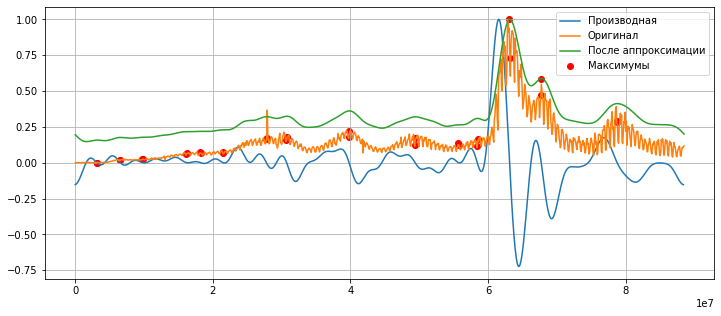

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(data_t.sec[:-1], df/max(df), label = 'Производная')
plt.plot(data_t['sec'], data_t["Заражений за день"]/max(data_t["Заражений за день"]), label = 'Оригинал')
plt.scatter(data_time, data_max/max(data_max), color='r', label = "Максимумы")
plt.plot(data_t.sec, new_y/max(new_y), label = 'После аппроксимации')
plt.legend()
plt.grid()

In [ ]:
z = np.polyfit(data_t.sec, data_t['Заражений за день'], 15)
p = np.poly1d(z)
y = p(data_t['sec'])

In [ ]:
data_time_max = []
for i in range(len(data_t)):
    if data_t['sec'][i] in data_time:
        data_time_max.append(str(data_t['DateTime'][i]).split()[0])
for i in range(len(data_time_max)):
    print(i, data_time_max[i])

0 2020-02-27
1 2020-02-28
2 2020-04-06
3 2020-04-07
4 2020-05-14
5 2020-05-15
6 2020-07-27
7 2020-07-28
8 2020-08-19
9 2020-08-20
10 2020-09-26
11 2020-09-27
12 2020-12-08
13 2020-12-09
14 2021-01-11
15 2021-01-12
16 2021-04-26
17 2021-04-27
18 2021-08-15
19 2021-08-16
20 2021-10-27
21 2021-10-28
22 2021-11-28
23 2021-11-29
24 2022-01-21
25 2022-01-22
26 2022-03-15
27 2022-03-16
28 2022-07-21
29 2022-07-22


In [ ]:
#убрать повторяющиеся даты
data_time_cut = []
data_max_cut = []
for i in range(0, len(data_time_max), 2):
    data_time_cut.append(data_time_max[i])
    data_max_cut.append(data_max[i])

In [ ]:
for i in data_time_cut:
    print(i)

2020-02-27
2020-04-06
2020-05-14
2020-07-27
2020-08-19
2020-09-26
2020-12-08
2021-01-11
2021-04-26
2021-08-15
2021-10-27
2021-11-28
2022-01-21
2022-03-15
2022-07-21
